In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
# import cv2
import tensorflow as tf
from matplotlib.image import imread
print("Number of GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')), "\n")
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Cropping2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

Number of GPUs Available:  1 



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive'

 ALEXNET_GYB.ipynb   ortak		       'VGG16 (1).ipynb'
 deneme_codes	    'Preprocess_13 (1).ipynb'   VGG_deneme.ipynb
 GYB		     train_test_split
 MSD		     train_test_split_gyb


## Image Preprocessing:

In [ ]:
train_datagen = ImageDataGenerator(
     rescale=1. / 255,
     width_shift_range=0.2,
     rotation_range=10, 
     height_shift_range=0.2, 
     zoom_range=0.2, 
     horizontal_flip=True,
     fill_mode='nearest',
     brightness_range=[0.5,1.2],
     validation_split=0.13)

test_datagen = ImageDataGenerator(
    rotation_range=10,
    rescale=1. / 255,
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    brightness_range=[0.5,1.2]) 

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/train_test_split_gyb/data_for_training',
    target_size=(128,128),
    shuffle = True,
    batch_size=16,
    class_mode='categorical',
    seed=2020,
    subset='training')


val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/train_test_split_gyb/data_for_training',
    target_size=(128,128),
    batch_size=16,
    shuffle = False,
    class_mode='categorical',
    seed=2020,
    subset='validation')

test_generator=test_datagen.flow_from_directory(
    '/content/drive/MyDrive/train_test_split_gyb/data_for_test',
    target_size=(128,128),
    batch_size=16,
    class_mode='categorical',
    seed=2020,
    shuffle = False)

Found 2349 images belonging to 3 classes.
Found 351 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


Found 2700 images belonging to 3 classes.


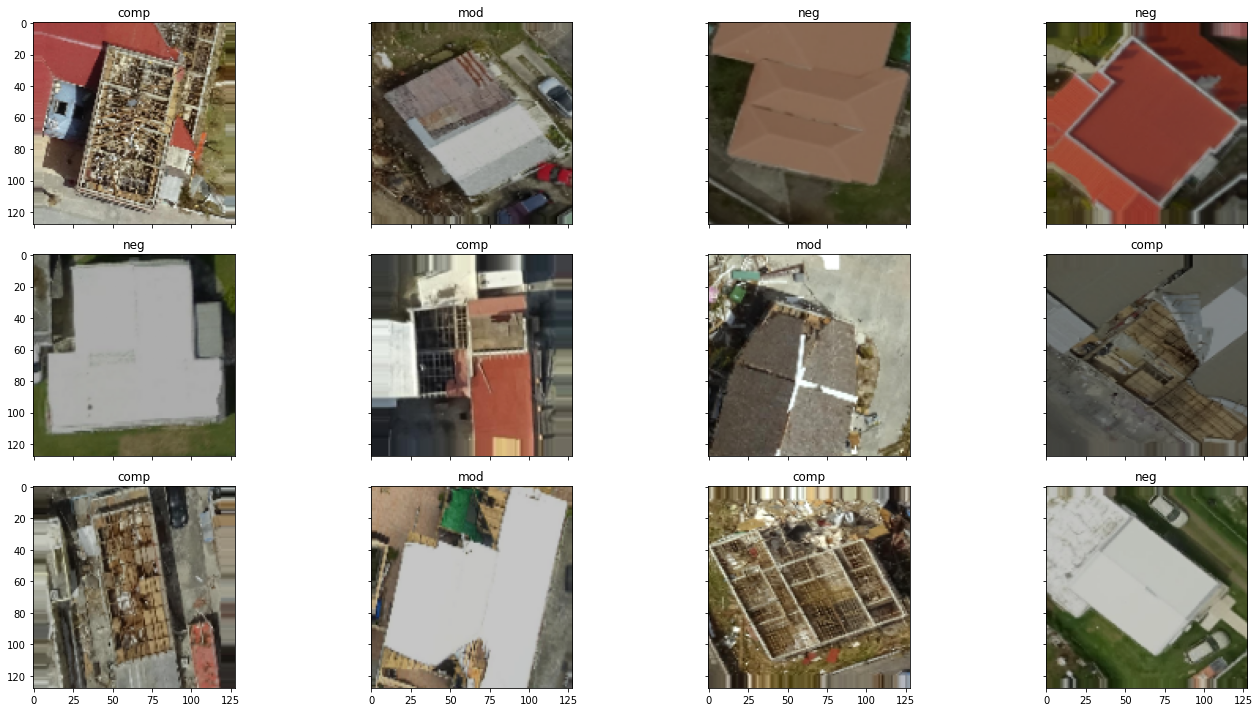

In [ ]:
train_iter = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/train_test_split_gyb/data_for_training/",target_size=(128, 128),
    batch_size=1)

class_name = {0:"comp" , 1 : 'mod', 2: 'neg'}
fig, ax = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(20,10))
ax = ax.flatten()
for i in range(12):
    img, label = train_iter.next()
    #print(label)
    #print(class_name[np.argmax(label)])
    ax[i].imshow(img[0])
    ax[i].set_title(class_name[np.argmax(label)])
fig.tight_layout()
plt.show()

In [ ]:
input_path = '/content/drive/MyDrive/train_test_split_gyb/'

def print_file_sizes(input_path, subset):
    print('{}:'.format(subset))
    print('')
    path = input_path + subset + '/'
    for f in os.listdir(path):
        if not os.path.isdir(path + f):
            print(f.ljust(30) + str(round(os.path.getsize(path + f) / 1000000, 2)) + 'MB')
        else:
            sizes = [os.path.getsize(path+f+'/'+x)/1000000 for x in os.listdir(path + f)]
            print(f.ljust(30) + str(round(sum(sizes), 2)) + 'MB' + ' ({} files)'.format(len(sizes)))
    print('')
    
print_file_sizes(input_path, 'data_for_training')
print_file_sizes(input_path, 'data_for_test')



data_for_training:

completely_output             635.04MB (900 files)
negligible_output             505.44MB (900 files)
moderately_output             605.18MB (900 files)

data_for_test:

completely_test               70.99MB (100 files)
moderately_test               60.07MB (100 files)
negligible_test               56.71MB (100 files)



In [ ]:
batch_size = 16
img_height = 128
img_width = 128

#####################################################



In [ ]:
num_classes = 3
model = Sequential([             
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='sigmoid',name='output')
])


In [ ]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                        

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

In [ ]:
batch_size = 16
history = model.fit(
  train_generator,
  validation_data=val_generator,
  epochs=75,
  callbacks=[early],
  steps_per_epoch=train_generator.samples//batch_size,
  validation_steps=val_generator.samples//batch_size
)

Epoch 1/75
146/146 [==============================] - 725s 5s/step - loss: 0.9416 - accuracy: 0.5864 - val_loss: 1.3368 - val_accuracy: 0.3036
Epoch 2/75
146/146 [==============================] - 23s 160ms/step - loss: 0.6974 - accuracy: 0.6657 - val_loss: 1.3219 - val_accuracy: 0.3393
Epoch 3/75
146/146 [==============================] - 21s 144ms/step - loss: 0.6401 - accuracy: 0.7008 - val_loss: 0.9278 - val_accuracy: 0.4464
Epoch 4/75
146/146 [==============================] - 21s 145ms/step - loss: 0.6118 - accuracy: 0.7175 - val_loss: 0.5027 - val_accuracy: 0.7857
Epoch 5/75
146/146 [==============================] - 21s 144ms/step - loss: 0.5934 - accuracy: 0.7338 - val_loss: 0.4393 - val_accuracy: 0.8125
Epoch 6/75
146/146 [==============================] - 21s 144ms/step - loss: 0.5738 - accuracy: 0.7342 - val_loss: 0.5075 - val_accuracy: 0.7917
Epoch 7/75
146/146 [==============================] - 21s 143ms/step - loss: 0.5678 - accuracy: 0.7467 - val_loss: 0.4195 - val_accu

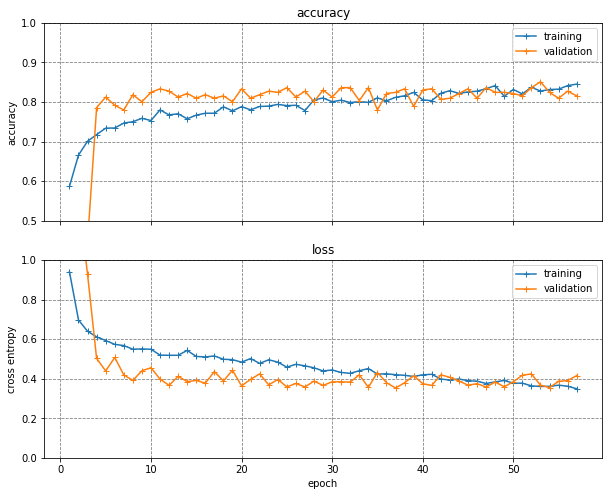

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8), sharex=True)

x_plot = np.arange(1, 57+1)

ax[0].plot(x_plot, acc, '+-', label='training')
ax[0].plot(x_plot, val_acc, '+-', label='validation')
ax[0].legend()
ax[0].set_ylabel('accuracy')
ax[0].set_ylim(0.5, 1)
ax[0].grid(ls='--', c='C7')
ax[0].set_title('accuracy')

ax[1].plot(x_plot, loss, '+-', label='training')
ax[1].plot(x_plot, val_loss, '+-', label='validation')
ax[1].legend()
ax[1].set_ylabel('cross entropy')
ax[1].set_ylim(0, 1)
ax[1].grid(ls='--', c='C7')
ax[1].set_title('loss')
ax[1].set_xlabel('epoch')

plt.show()

In [ ]:
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_generator.labels,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       100
           1       0.79      0.68      0.73       100
           2       0.78      0.90      0.83       100

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



In [ ]:
import pandas as pd
classes=['comp','mod','neg']
con_mat_df = pd.DataFrame(confusion_matrix(test_generator.labels,y_pred),
                     index = classes, 
                     columns = classes)

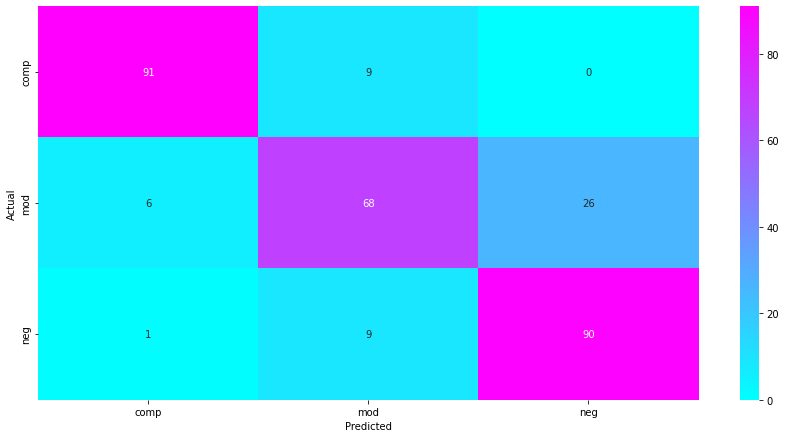

In [ ]:
import seaborn as sns
figure = plt.figure(figsize=(12, 6))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.cool,fmt='d')
plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()